# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

In [207]:
import pandas as pd
import numpy as np

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 



<Axes: >

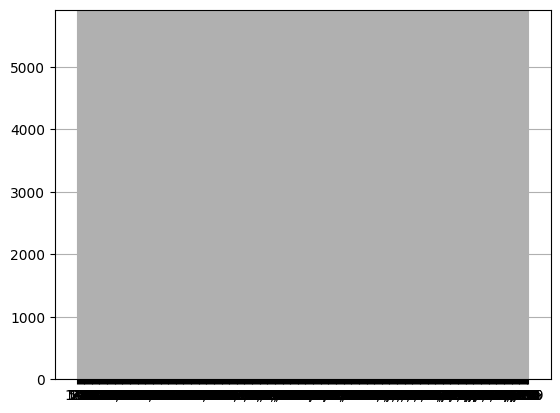

In [208]:
airbnb = pd.read_csv("https://raw.githubusercontent.com/xec9cp/wrangling_assignment/refs/heads/main/data/airbnb_hw.csv",index_col=0)
#print(airbnb['Price'].unique(),'\n')

print('Before coercion: \n', airbnb['Price'].describe(),'\n') # The imposed sentence variable is not read by Pandas as a number
airbnb['Price'].hist(bins=50)

In [209]:
airbnb['Price'] = airbnb['Price'].str.replace(",", "") #remove commas
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce') # Coerce the variable to numeric

# Create a missing dummy:
airbnb['price_na'] = airbnb['Price'].isnull() # Equals 1 if missing, 0 if non-null

After coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Total Missings: 
 0 



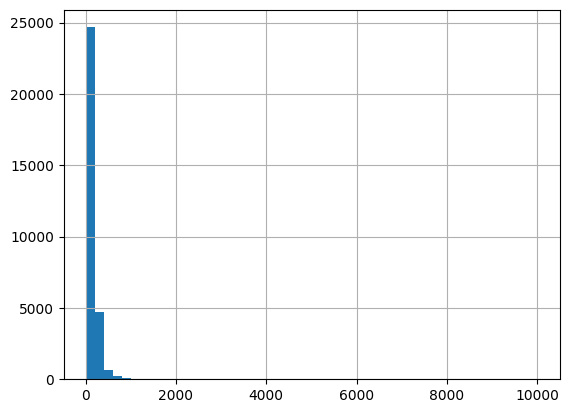

In [210]:
# After coercion:
print('After coercion: \n', airbnb['Price'].describe(),'\n') # Describe the numeric variable
airbnb['Price'].hist(bins = 50) # Histogram of the variable values
print('Total Missings: \n', sum(airbnb['price_na']),'\n')

- The commas were removed and the data were coerced into float type.

- There are no missing values in the `Price` variable.

---

2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?

In [211]:
police = pd.read_csv(
    "https://raw.githubusercontent.com/xec9cp/wrangling_assignment/refs/heads/main/data/mn_police_use_of_force.csv"
    , index_col = 0)
print(police['subject_injury'].unique())
print(police['subject_injury'].value_counts(), "\n")

[nan 'No' 'Yes']
subject_injury
Yes    1631
No     1446
Name: count, dtype: int64 



In [212]:
police['subject_injury'] = police['subject_injury'].replace({'Yes': 1, 'No': 0}) #change the "Yes"/"No" to 1/0
print(police['subject_injury'].value_counts(), "\n")

# Create a missing dummy:
police['subject_injury_nan'] = police['subject_injury'].isnull() # Equals 1 if missing, 0 if non-null

subject_injury
1.0    1631
0.0    1446
Name: count, dtype: int64 



/tmp/ipython-input-945260236.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  police['subject_injury'] = police['subject_injury'].replace({'Yes': 1, 'No': 0}) #change the "Yes"/"No" to 1/0


In [213]:
print('Proportion Missings: \n', (sum(police['subject_injury_nan'])/police.shape[0]),'\n') #missing proportion
pd.crosstab(police['subject_injury_nan'], police['force_type'])

Proportion Missings: 
 0.7619342359767892 



force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_nan,,,,,,,,,,,
False,2,2379,172,2,77,74,0,3,0,46,322
True,2,7051,1421,0,27,74,87,0,170,31,985


From the table, we can see that for all entries with Force Type "Less Lethal" and "Maximal Restraint Technique" are having missing values for Subject Injury variable. There are no missing values for entries with "Firearm" and "Less Lethal Projectile" Force Type. And we cannot tell any pattern for the other force type categories as those entries are scattered with missing values for their Subject Injury variable.


---

3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

In [214]:
justice = pd.read_parquet(
    "https://raw.githubusercontent.com/xec9cp/wrangling_assignment/refs/heads/main/data/justice_data.parquet")
justice = justice.rename(columns={'WhetherDefendantWasReleasedPretrial':'released'})
print(justice['released'].unique()) #9 mean unclear, we could replace them to np.nan

[9 0 1]


In [215]:
justice['released']=justice['released'].replace(9,np.nan) #such we can treat this variable as a Boolean
justice['released_na'] = justice['released'].isnull() # Equals 1 if missing, 0 if non-null
print(justice['released'].value_counts(), "\n")

released
1.0    19154
0.0     3801
Name: count, dtype: int64 



4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [216]:
justice = justice.rename(columns = {'ImposedSentenceAllChargeInContactEvent':'imposed_sentence',
                          'SentenceTypeAllChargesAtConvictionInContactEvent': 'sentence_type'})
# print(justice['imposed_sentence'].unique()) # check for the missing value
print(justice['imposed_sentence'].value_counts(), "\n")

imposed_sentence
                    9053
0                   4953
12                  1404
.985626283367556    1051
6                    809
                    ... 
11.9055441478439       1
35.0061601642711       1
46.6242299794661       1
81.0225872689938       1
202                    1
Name: count, Length: 484, dtype: int64 



Before coercion: 
 count     22986
unique      484
top            
freq       9053
Name: imposed_sentence, dtype: object 



sentence_type,0,1,2,4,9
imposed_sentence,,,,,
,0,0,0,8779,274
.0328542094455852,0,6,0,0,0
.0657084188911704,3,21,0,0,0
.0985626283367557,2,6,0,0,0
.131416837782341,4,10,0,0,0
...,...,...,...,...,...
98,0,0,1,0,0
98.95687885,0,0,1,0,0
99,0,1,0,0,0


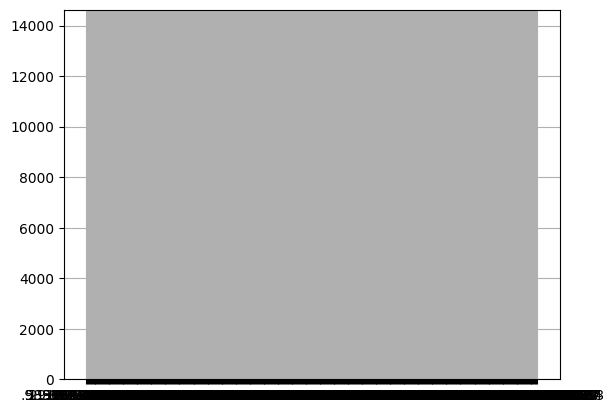

In [217]:
print('Before coercion: \n', justice['imposed_sentence'].describe(),'\n')
# The imposed sentence variable is not read by Pandas as a number

justice['imposed_sentence'].hist(bins=50)
# print(justice['imposed_sentence'].unique()) #this helps to find out how the missing values were shown in the data
pd.crosstab(justice['imposed_sentence'], justice['sentence_type'])

In [218]:
justice['imposed_sentence'] = justice['imposed_sentence'].replace(' ',np.nan)
justice['imposed_sentence'] = pd.to_numeric(justice['imposed_sentence'], errors='coerce') # Coerce the variable to numeric
# Create a missing dummy:
justice['imposed_sentence_nan'] = justice['imposed_sentence'].isnull() # Equals 1 if missing, 0 if non-null

After coercion: 
 count    13933.000000
mean        19.899671
std         63.571627
min          0.000000
25%          0.000000
50%          2.000000
75%         12.000000
max       2208.000000
Name: imposed_sentence, dtype: float64 

Total Missings: 
 9053 



sentence_type,0,1,2
imposed_sentence,,,
0.000000,4953,0,0
0.032854,0,6,0
0.065708,3,21,0
0.098563,2,6,0
0.131417,4,10,0
...,...,...,...
1200.000000,0,0,1
1500.000000,0,0,1
1752.000000,0,0,1


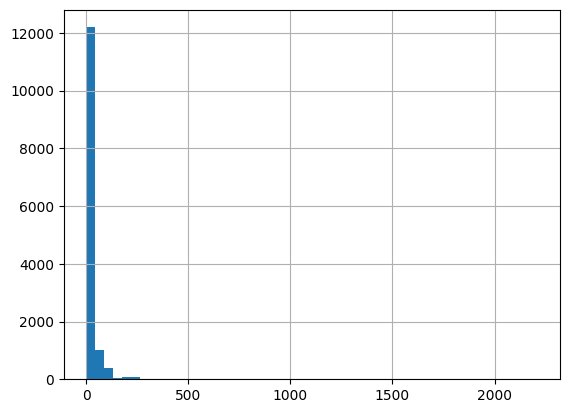

In [219]:
# After coercion:
print('After coercion: \n', justice['imposed_sentence'].describe(),'\n') # Describe the numeric variable
justice['imposed_sentence'].hist(bins=50) # Histogram of the variable values
print('Total Missings: \n', sum(justice['imposed_sentence_nan']),'\n')
pd.crosstab(justice['imposed_sentence'], justice['sentence_type'])

---
From the two cross-tabulate result, we find that values for the `imposed_sentence` variable are missing if the `sentence_type` have code 4 (deferred, etc.) and 9 (Not applicable (e.g., disposition record not found, or unknown) ).

The missing values were handled as `np.nan` for the `imposed_sentence` variable, with a missing dummy variable `imposed_sentence_nan` to help flag out them.


---

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)